## Mapping of concepts to application domains

### Using sim scores to rank mapping

In [1]:
import pandas as pd

sim_code_domain_df = pd.read_csv("sim_code_domain_df.csv")
sim_test_domain_df = pd.read_csv("sim_test_domain_df.csv")
sim_doc_domain_df = pd.read_csv("sim_doc_domain_df.csv")

In [2]:
# split into the different embeddings used for each artifact

sow2v_sim_code_df = sim_code_domain_df[["project_name",	"module", "concept", "domains", "sow2v_code_sim_score"]]
gpt_sim_code_df = sim_code_domain_df[["project_name",	"module", "concept", "domains", "gpt_code_sim_score"]]
angle_sim_code_df = sim_code_domain_df[["project_name",	"module", "concept", "domains", "angle_code_sim_score"]]

sow2v_sim_test_df = sim_test_domain_df[["project_name",	"module", "concept", "domains", "sow2v_test_sim_score"]]
gpt_sim_test_df = sim_test_domain_df[["project_name",	"module", "concept", "domains", "gpt_test_sim_score"]]
angle_sim_test_df = sim_test_domain_df[["project_name",	"module", "concept", "domains", "angle_test_sim_score"]]

sow2v_sim_doc_df = sim_doc_domain_df[["project_name",	"module", "concept", "domains", "sow2v_doc_sim_score"]]
gpt_sim_doc_df = sim_doc_domain_df[["project_name",	"module", "concept", "domains", "gpt_doc_sim_score"]]
angle_sim_doc_df = sim_doc_domain_df[["project_name",	"module", "concept", "domains", "angle_doc_sim_score"]]

In [3]:
sow2v_code_dfs = [x for _, x in sow2v_sim_code_df.groupby(['project_name', 'module'])]
sow2v_test_dfs = [x for _, x in sow2v_sim_test_df.groupby(['project_name', 'module'])]
sow2v_doc_dfs = [x for _, x in sow2v_sim_doc_df.groupby(['project_name', 'module'])]
gpt_code_dfs = [x for _, x in gpt_sim_code_df.groupby(['project_name', 'module'])]
gpt_test_dfs = [x for _, x in gpt_sim_test_df.groupby(['project_name', 'module'])]
gpt_doc_dfs = [x for _, x in gpt_sim_doc_df.groupby(['project_name', 'module'])]
angle_code_dfs = [x for _, x in angle_sim_code_df.groupby(['project_name', 'module'])]
angle_test_dfs = [x for _, x in angle_sim_test_df.groupby(['project_name', 'module'])]
angle_doc_dfs = [x for _, x in angle_sim_doc_df.groupby(['project_name', 'module'])]

In [4]:
import numpy as np
import ast

def calculate_agg(df, col_name, emb_name):
    # transpose the lists in sim score col
    list_of_list = df[col_name].tolist()
    list_of_list = [ast.literal_eval(x) for x in list_of_list]
    transposed_l = [list(i) for i in zip(*list_of_list)]

    agg_values = [np.mean(x) for x in transposed_l]

    df = df[['project_name', 'module', 'domains']]
    df = df.drop_duplicates()

    df[f"{emb_name}_sim_score"] = str(agg_values)

    return df

In [5]:
res = []
for df in sow2v_code_dfs:
    res.append(calculate_agg(df, "sow2v_code_sim_score", "sow2v"))
    sow2v_agg_sim_code_df = pd.concat(res, ignore_index=True)

res = []
for df in sow2v_test_dfs:
    res.append(calculate_agg(df, "sow2v_test_sim_score", "sow2v"))
    sow2v_agg_sim_test_df = pd.concat(res, ignore_index=True)

res = []
for df in sow2v_doc_dfs:
    res.append(calculate_agg(df, "sow2v_doc_sim_score", "sow2v"))
    sow2v_agg_sim_doc_df = pd.concat(res, ignore_index=True)

In [6]:
res = []
for df in gpt_code_dfs:
    res.append(calculate_agg(df, "gpt_code_sim_score", "gpt"))
    gpt_agg_sim_code_df = pd.concat(res, ignore_index=True)

res = []
for df in gpt_test_dfs:
    res.append(calculate_agg(df, "gpt_test_sim_score", "gpt"))
    gpt_agg_sim_test_df = pd.concat(res, ignore_index=True)

res = []
for df in gpt_doc_dfs:
    res.append(calculate_agg(df, "gpt_doc_sim_score", "gpt"))
    gpt_agg_sim_doc_df = pd.concat(res, ignore_index=True)

In [7]:
res = []
for df in angle_code_dfs:
    res.append(calculate_agg(df, "angle_code_sim_score", "angle"))
    angle_agg_sim_code_df = pd.concat(res, ignore_index=True)

res = []
for df in angle_test_dfs:
    res.append(calculate_agg(df, "angle_test_sim_score", "angle"))
    angle_agg_sim_test_df = pd.concat(res, ignore_index=True)

res = []
for df in angle_doc_dfs:
    res.append(calculate_agg(df, "angle_doc_sim_score", "angle"))
    angle_agg_sim_doc_df = pd.concat(res, ignore_index=True)

In [8]:
gpt_agg_sim_code_df

,project_name,module,domains,gpt_sim_score
0,01_dubbo,dubbo-cluster,"['Bayesian inference', 'Containerization', 'Fi...","[0.709441669601437, 0.7153327627191054, 0.7074..."
1,01_dubbo,dubbo-common,"['3D computer graphics', '3D modeling', 'Bidir...","[0.6777978389966413, 0.691913162298047, 0.6912..."
2,01_dubbo,dubbo-compatible,"['Bayesian inference', 'File Transfer Protocol...","[0.6958883379659868, 0.7348166684254127, 0.741..."
3,01_dubbo,dubbo-config,"['3D modeling', 'Bayesian inference', 'Contain...","[0.6959604717875019, 0.7154515052213876, 0.729..."
4,01_dubbo,dubbo-configcenter,"['File Transfer Protocol', 'HTTP client', 'HTT...","[0.6891994119261012, 0.7109551637036584, 0.704..."
...,...,...,...,...
155,15_zeppelin,zeppelin-jupyter,"['File Transfer Protocol', 'HTTP client', 'HTT...","[0.7093063016205187, 0.712728181065108, 0.7188..."
156,15_zeppelin,zeppelin-jupyter-interpreter,"['File Transfer Protocol', 'HTTP client', 'HTT...","[0.6965212253494527, 0.7277433228325697, 0.722..."
157,15_zeppelin,zeppelin-plugins,"['File Transfer Protocol', 'HTTP server', 'Par...","[0.7177351138110909, 0.7176155208167917, 0.716..."
158,15_zeppelin,zeppelin-server,"['Containerization', 'DevOps', 'File Transfer ...","[0.7282830578744783, 0.7355959373523551, 0.723..."


In [9]:
# Extract and rank the domains according to similarity scores

def extract_rank_domains(df, emb_name, out_folder):
    scores = df[f"{emb_name}_sim_score"].tolist()
    scores = [ast.literal_eval(x) for x in scores]

    doms = df["domains"].tolist()
    doms = [ast.literal_eval(x) for x in doms]

    # Convert 'str' values to 'float'
    scores = [[float(val) for val in sublist] for sublist in scores]

    # Transpose the lists in sim score col
    transposed_l = [list(i) for i in zip(*[doms, scores])]

    # Sort the domains according to the sim scores
    sorted_doms = [sorted(list(zip(dom, score)), key=lambda x: x[1], reverse=True) for dom, score in transposed_l]

    # Remove sim scores < 0.0
    sorted_doms = [[x for x in sublist if x[1] > 0.0] for sublist in sorted_doms]

    res = []

    # Convert to dataframe
    for i in range(len(sorted_doms)):
        curr_df = pd.DataFrame(sorted_doms[i], columns=["domain", "sim_score"])
        curr_df["project_name"] = df["project_name"].iloc[i]
        curr_df["module"] = df["module"].iloc[i]
        curr_df = curr_df[["project_name", "module", "domain", "sim_score"]]
        
        curr_df.to_csv(f"sim_scores_results/{out_folder}/{df['project_name'].iloc[i]}_{df['module'].iloc[i]}_{emb_name}_ranked_domains.csv", index=False)

    print(f"Extracted and ranked domains for {emb_name} embeddings")

In [68]:
extract_rank_domains(sow2v_agg_sim_code_df, "sow2v", "sow2v_code")
extract_rank_domains(gpt_agg_sim_code_df, "gpt", "gpt_code")
extract_rank_domains(angle_agg_sim_code_df, "angle", "angle_code")
extract_rank_domains(sow2v_agg_sim_test_df, "sow2v", "sow2v_test")
extract_rank_domains(gpt_agg_sim_test_df, "gpt", "gpt_test")
extract_rank_domains(angle_agg_sim_test_df, "angle", "angle_test")
extract_rank_domains(sow2v_agg_sim_doc_df, "sow2v", "sow2v_doc")
extract_rank_domains(gpt_agg_sim_doc_df, "gpt", "gpt_doc")
extract_rank_domains(angle_agg_sim_doc_df, "angle", "angle_doc")

Extracted and ranked domains for sow2v embeddings
Extracted and ranked domains for gpt embeddings
Extracted and ranked domains for angle embeddings
Extracted and ranked domains for sow2v embeddings
Extracted and ranked domains for gpt embeddings
Extracted and ranked domains for angle embeddings
Extracted and ranked domains for sow2v embeddings
Extracted and ranked domains for gpt embeddings
Extracted and ranked domains for angle embeddings


## Overview of mapping results

In [24]:
sow2v_agg_sim_code_df

,project_name,module,domains,sow2v_sim_score
0,01_dubbo,dubbo-cluster,"['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,01_dubbo,dubbo-common,"['3D computer graphics', '3D modeling', 'Bidir...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,01_dubbo,dubbo-compatible,"['Bayesian inference', 'File Transfer Protocol...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,01_dubbo,dubbo-config,"['3D modeling', 'Bayesian inference', 'Contain...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,01_dubbo,dubbo-configcenter,"['File Transfer Protocol', 'HTTP client', 'HTT...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.19106198833333332,..."
...,...,...,...,...
155,15_zeppelin,zeppelin-jupyter,"['File Transfer Protocol', 'HTTP client', 'HTT...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.042..."
156,15_zeppelin,zeppelin-jupyter-interpreter,"['File Transfer Protocol', 'HTTP client', 'HTT...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1061919311599..."
157,15_zeppelin,zeppelin-plugins,"['File Transfer Protocol', 'HTTP server', 'Par...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0818687657142..."
158,15_zeppelin,zeppelin-server,"['Containerization', 'DevOps', 'File Transfer ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [60]:
code_scores = [sow2v_agg_sim_code_df["sow2v_sim_score"].tolist(), gpt_agg_sim_code_df["gpt_sim_score"].tolist(), angle_agg_sim_code_df["angle_sim_score"].tolist()]
code_scores = [[ast.literal_eval(x) for x in sublist] for sublist in code_scores]
# remove negatives
code_scores = [[[x for x in subsublist if x >=0] for subsublist in sublist] for sublist in code_scores]
# flatten sublist in list
code_scores[0] = [item for sublist in code_scores[0] for item in sublist]
code_scores[1] = [item for sublist in code_scores[1] for item in sublist]
code_scores[2] = [item for sublist in code_scores[2] for item in sublist]

In [64]:
test_scores = [sow2v_agg_sim_test_df["sow2v_sim_score"].tolist(), gpt_agg_sim_test_df["gpt_sim_score"].tolist(), angle_agg_sim_test_df["angle_sim_score"].tolist()]
test_scores = [[ast.literal_eval(x) for x in sublist] for sublist in test_scores]
# remove negatives
test_scores = [[[x for x in subsublist if x >=0] for subsublist in sublist] for sublist in test_scores]
# flatten sublist in list
test_scores[0] = [item for sublist in test_scores[0] for item in sublist]
test_scores[1] = [item for sublist in test_scores[1] for item in sublist]
test_scores[2] = [item for sublist in test_scores[2] for item in sublist]

In [65]:
doc_scores = [sow2v_agg_sim_doc_df["sow2v_sim_score"].tolist(), gpt_agg_sim_doc_df["gpt_sim_score"].tolist(), angle_agg_sim_doc_df["angle_sim_score"].tolist()]
doc_scores = [[ast.literal_eval(x) for x in sublist] for sublist in doc_scores]
# remove negatives
doc_scores = [[[x for x in subsublist if x >=0] for subsublist in sublist] for sublist in doc_scores]
# flatten sublist in list
doc_scores[0] = [item for sublist in doc_scores[0] for item in sublist]
doc_scores[1] = [item for sublist in doc_scores[1] for item in sublist]
doc_scores[2] = [item for sublist in doc_scores[2] for item in sublist]

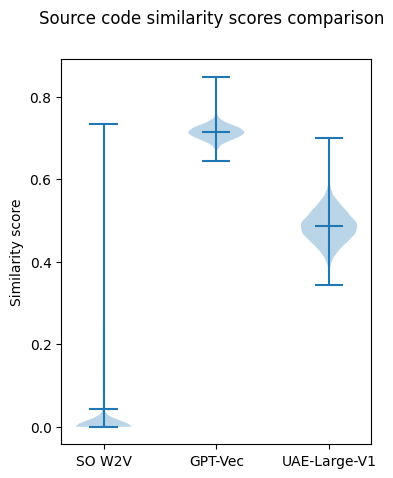

In [63]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, 1)
fig.suptitle("Source code similarity scores comparison")

ax1.violinplot(code_scores, positions=range(len(code_scores)), showmeans=True)
# ax1.xlabel("Embedding model")
ax1.set_ylabel("Similarity score")
ax1.set_xticks(ticks=[0,1,2], labels=["SO W2V", "GPT-Vec", "UAE-Large-V1"])

fig.set_size_inches(4, 5)


plt.show()

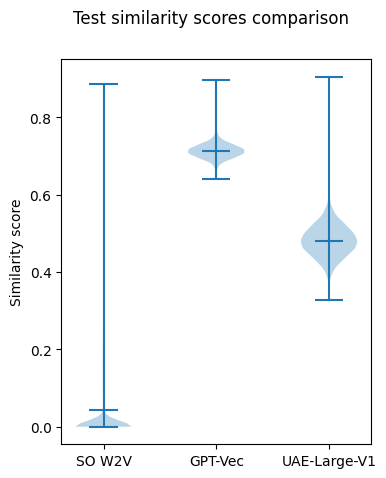

In [67]:
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle("Test similarity scores comparison")

ax1.violinplot(test_scores, positions=range(len(test_scores)), showmeans=True)
# ax1.xlabel("Embedding model")
ax1.set_ylabel("Similarity score")
ax1.set_xticks(ticks=[0,1,2], labels=["SO W2V", "GPT-Vec", "UAE-Large-V1"])

fig.set_size_inches(4, 5)


plt.show()

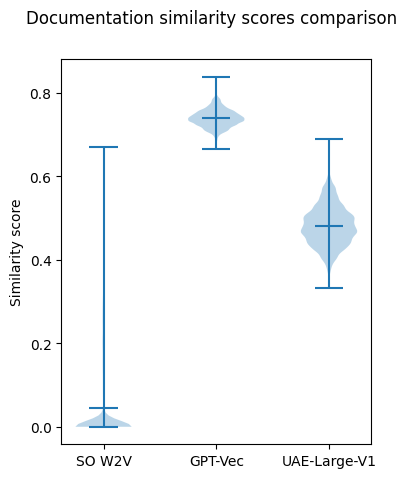

In [68]:
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle("Documentation similarity scores comparison")

ax1.violinplot(doc_scores, positions=range(len(doc_scores)), showmeans=True)
# ax1.xlabel("Embedding model")
ax1.set_ylabel("Similarity score")
ax1.set_xticks(ticks=[0,1,2], labels=["SO W2V", "GPT-Vec", "UAE-Large-V1"])

fig.set_size_inches(4, 5)


plt.show()

## Trace links for semantics (RQ3)

In [32]:
def compare_sim_trace(left_df_lst, right_df_lst):

    assert len(left_df_lst) == len(right_df_lst), "Length of left and right dataframes should be equal"

    res = []

    for i in range(len(left_df_lst)):
        left_df = left_df_lst[i]
        right_df = right_df_lst[i]
        merged_df = left_df.merge(right_df, on='domain')
        merged_df = merged_df.assign(diff_sim = lambda x: abs(x['sim_score_x'] - x['sim_score_y']))
        merged_df = merged_df.sort_values(by='diff_sim', ascending=True).reset_index(drop=True)
        merged_df = merged_df[['project_name_x', 'module_x', 'domain', 'diff_sim']]
        merged_df.columns = ['project_name', 'module', 'domain', 'diff_sim']
        res.append(merged_df)

    return res

In [33]:
import glob

def get_dfs(files):
    dfs = []
    for file in files:
        df = pd.read_csv(file)
        dfs.append(df)
    return dfs

# get sim results of all modules
sow2v_code = get_dfs(glob.glob("sim_scores_results\\sow2v_code\\*.csv"))
sow2v_test = get_dfs(glob.glob("sim_scores_results\\sow2v_test\\*.csv"))
sow2v_doc = get_dfs(glob.glob("sim_scores_results\\sow2v_doc\\*.csv"))
gpt_code = get_dfs(glob.glob("sim_scores_results\\gpt_code\\*.csv"))
gpt_test = get_dfs(glob.glob("sim_scores_results\\gpt_test\\*.csv"))
gpt_doc = get_dfs(glob.glob("sim_scores_results\\gpt_doc\\*.csv"))
angle_code = get_dfs(glob.glob("sim_scores_results\\angle_code\\*.csv"))
angle_test = get_dfs(glob.glob("sim_scores_results\\angle_test\\*.csv"))
angle_doc = get_dfs(glob.glob("sim_scores_results\\angle_doc\\*.csv"))


In [36]:
# compare sim scores of all modules
sow2v_code_test = compare_sim_trace(sow2v_code, sow2v_test)
sow2v_code_doc = compare_sim_trace(sow2v_code, sow2v_doc)
sow2v_test_doc = compare_sim_trace(sow2v_test, sow2v_doc)
gpt_code_test = compare_sim_trace(gpt_code, gpt_test)
gpt_code_doc = compare_sim_trace(gpt_code, gpt_doc)
gpt_test_doc = compare_sim_trace(gpt_test, gpt_doc)
angle_code_test = compare_sim_trace(angle_code, angle_test)
angle_code_doc = compare_sim_trace(angle_code, angle_doc)
angle_test_doc = compare_sim_trace(angle_test, angle_doc)

In [41]:
# save the results
import os

def save_results(res, out_folder):
    if not os.path.exists(f"trace_results/{out_folder}"):
        os.makedirs(f"trace_results/{out_folder}")
        
    for i in range(len(res)):
        res[i].to_csv(f"trace_results/{out_folder}/{res[i]['project_name'].iloc[0]}_{res[i]['module'].iloc[0]}_diff_sim.csv", index=False)

In [42]:
save_results(sow2v_code_test, "sow2v_code_test")
save_results(sow2v_code_doc, "sow2v_code_doc")
save_results(sow2v_test_doc, "sow2v_test_doc")
save_results(gpt_code_test, "gpt_code_test")
save_results(gpt_code_doc, "gpt_code_doc")
save_results(gpt_test_doc, "gpt_test_doc")
save_results(angle_code_test, "angle_code_test")
save_results(angle_code_doc, "angle_code_doc")
save_results(angle_test_doc, "angle_test_doc")